<a href="https://colab.research.google.com/github/uschauhan-dev/Machine-Learning/blob/main/Stock_Market_Prediction_using_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Load the datasets
adani_df = pd.read_csv('/content/ADANIPORTS.csv')
reliance_df = pd.read_csv('/content/RELIANCE.csv')
wipro_df = pd.read_csv('/content/WIPRO.csv')

# Check for missing values and drop them if any
adani_df.dropna(inplace=True)
reliance_df.dropna(inplace=True)
wipro_df.dropna(inplace=True)

# Preprocessing: Select relevant columns (e.g., 'Date', 'Close')
adani_df = adani_df[['Date', 'Close']]
reliance_df = reliance_df[['Date', 'Close']]
wipro_df = wipro_df[['Date', 'Close']]

# Renaming the columns for clarity
adani_df.rename(columns={'Close': 'Adani_Close'}, inplace=True)
reliance_df.rename(columns={'Close': 'Reliance_Close'}, inplace=True)
wipro_df.rename(columns={'Close': 'Wipro_Close'}, inplace=True)

# Merge the data on the 'Date' column
merged_df = adani_df.merge(reliance_df, on='Date').merge(wipro_df, on='Date')

# Convert 'Date' to datetime format and sort by date
merged_df['Date'] = pd.to_datetime(merged_df['Date'])
merged_df.sort_values('Date', inplace=True)

# Set 'Date' as the index
merged_df.set_index('Date', inplace=True)

# Display the first few rows of the merged dataframe
print(merged_df.head())


            Adani_Close  Reliance_Close  Wipro_Close
Date                                                
2011-06-01       164.00          946.80       448.30
2011-06-02       161.25          951.05       442.95
2011-06-03       161.05          934.60       443.10
2011-06-06       159.85          937.75       445.05
2011-06-07       157.25          958.25       440.60


<ipython-input-2-529498b4baff>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adani_df.rename(columns={'Close': 'Adani_Close'}, inplace=True)


In [3]:
# Scale the data using MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(merged_df)

# Convert scaled data back to DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=merged_df.columns, index=merged_df.index)

# Split the data into training and testing sets
train_data, test_data = train_test_split(scaled_df, test_size=0.2, shuffle=False)

# Display the shapes of the datasets
print(f"Train Data Shape: {train_data.shape}")
print(f"Test Data Shape: {test_data.shape}")


Train Data Shape: (1964, 3)
Test Data Shape: (492, 3)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 80ms/step - loss: 0.0407 - val_loss: 0.0194
Epoch 2/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 74ms/step - loss: 0.0047 - val_loss: 0.0070
Epoch 3/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - loss: 0.0037 - val_loss: 0.0048
Epoch 4/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 78ms/step - loss: 0.0033 - val_loss: 0.0046
Epoch 5/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - loss: 0.0033 - val_loss: 0.0046
Epoch 6/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step - loss: 0.0030 - val_loss: 0.0041
Epoch 7/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 7s 90ms/step - loss: 0.0029 - val_loss: 0.0039
Epoch 8/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 8s 60ms/step - loss: 0.0027 - val_loss: 0.0042
Epoch 9/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 71ms/step - loss: 0.0027 - val_loss: 0.0046
Epoch 10/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - loss: 0.0023 - val_loss: 0.0062
Epoch 11/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - loss: 0.0024 - val_loss: 0.0041
Epoch 12/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 72ms/step - loss: 0.

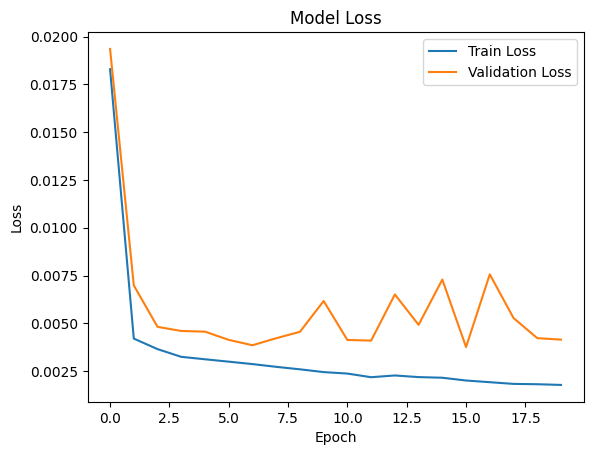

In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Prepare the data for LSTM
def create_sequences(data, sequence_length):
    X = []
    y = []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i + sequence_length])
        y.append(data[i + sequence_length])
    return np.array(X), np.array(y)

sequence_length = 60
X_train, y_train = create_sequences(train_data.values, sequence_length)
X_test, y_test = create_sequences(test_data.values, sequence_length)

# Reshape the data for LSTM input (samples, timesteps, features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2]))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2]))

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=X_train.shape[2]))  # Predict all stock prices

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Plot training & validation loss values
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted Prices:
             Adani_Close  Reliance_Close  Wipro_Close
Date                                                
2021-04-26   644.434143     1711.741699   399.873444
2021-04-27   641.699646     1716.999512   405.514893
2021-04-28   640.251160     1731.692627   409.653442
2021-04-29   639.270020     1750.838257   412.650208
2021-04-30   638.694397     1773.874634   414.487854
Actual Prices:
             Adani_Close  Reliance_Close  Wipro_Close
Date                                                
2021-04-26       730.75         1937.85       480.30
2021-04-27       749.15         1988.65       485.05
2021-04-28       746.25         1997.30       489.30
2021-04-29       746.75         2024.05       489.85
2021-04-30       730.05         1994.50       492.75


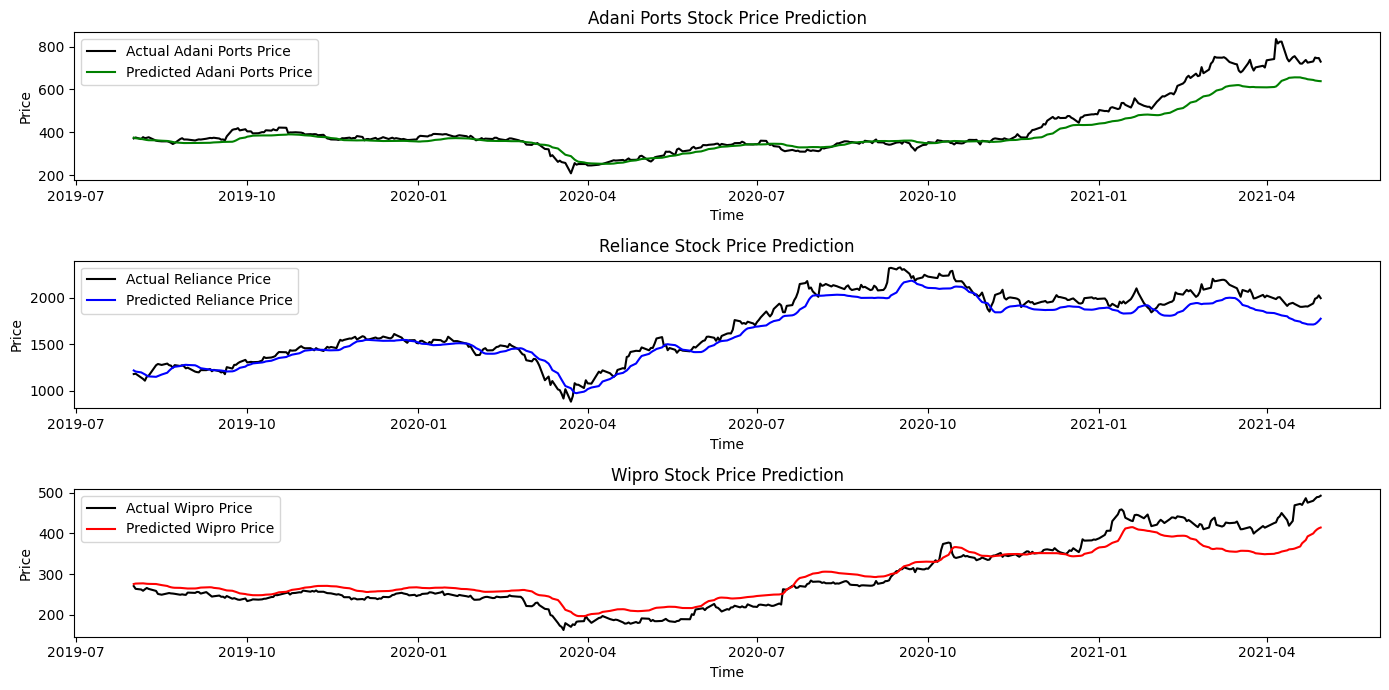

In [6]:
# Assuming the model is already trained and the data has been preprocessed as described earlier

# Make predictions using the test data
predicted_prices = model.predict(X_test)

# Inverse transform the scaled data to get actual price predictions
predicted_prices = scaler.inverse_transform(predicted_prices)
actual_prices = scaler.inverse_transform(y_test)

# Create a DataFrame to store actual and predicted prices
predicted_df = pd.DataFrame(predicted_prices, columns=merged_df.columns, index=test_data.index[sequence_length:])
actual_df = pd.DataFrame(actual_prices, columns=merged_df.columns, index=test_data.index[sequence_length:])

# Display the predicted and actual prices for the last few entries
print("Predicted Prices:\n", predicted_df.tail())
print("Actual Prices:\n", actual_df.tail())

# Plot the predictions vs actual values for all stocks
plt.figure(figsize=(14, 7))

plt.subplot(3, 1, 1)
plt.plot(actual_df['Adani_Close'], color='black', label='Actual Adani Ports Price')
plt.plot(predicted_df['Adani_Close'], color='green', label='Predicted Adani Ports Price')
plt.title('Adani Ports Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(actual_df['Reliance_Close'], color='black', label='Actual Reliance Price')
plt.plot(predicted_df['Reliance_Close'], color='blue', label='Predicted Reliance Price')
plt.title('Reliance Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(actual_df['Wipro_Close'], color='black', label='Actual Wipro Price')
plt.plot(predicted_df['Wipro_Close'], color='red', label='Predicted Wipro Price')
plt.title('Wipro Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()

plt.tight_layout()
plt.show()



In [7]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Function to classify price movements
def price_direction(prices):
    direction = []
    for i in range(1, len(prices)):
        if prices[i] > prices[i-1]:
            direction.append(1)
        else:
            direction.append(0)
    return np.array(direction)

# Get the actual and predicted price directions
actual_directions = price_direction(actual_prices[:, 0])  # Assuming we are focusing on Adani Ports
predicted_directions = price_direction(predicted_prices[:, 0])

# Ensure both arrays have the same length
min_length = min(len(actual_directions), len(predicted_directions))
actual_directions = actual_directions[:min_length]
predicted_directions = predicted_directions[:min_length]

# Compute the confusion matrix
cm = confusion_matrix(actual_directions, predicted_directions)
print("Confusion Matrix:\n", cm)

# Compute accuracy, precision, recall, and F1 score
accuracy = accuracy_score(actual_directions, predicted_directions)
precision = precision_score(actual_directions, predicted_directions)
recall = recall_score(actual_directions, predicted_directions)
f1 = f1_score(actual_directions, predicted_directions)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Confusion Matrix:
 [[ 88 120]
 [ 85 138]]
Accuracy: 0.52
Precision: 0.53
Recall: 0.62
F1 Score: 0.57


In [9]:
# Save the trained model
model.save('stock_prediction_model.keras')
